In [84]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [85]:
import keras
print(keras.__version__)

2.13.1


In [86]:
print(tf.test.is_gpu_available())


False


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from zipfile import *
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping



In [88]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [89]:
train_datagen = ImageDataGenerator (
    rescale=1./255, 
    shear_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:/emotionDetection/dataset/train', target_size=(48, 48), batch_size=16, class_mode='categorical',color_mode='grayscale')
test_generator = test_datagen.flow_from_directory('D:/emotionDetection/dataset/test', target_size=(48, 48), batch_size=16,color_mode='grayscale', class_mode='categorical')
validation_generator = train_datagen.flow_from_directory('D:/emotionDetection/dataset/val', target_size=(48, 48), color_mode='grayscale', batch_size=16, class_mode='categorical')


Found 726 images belonging to 7 classes.
Found 129 images belonging to 7 classes.


Found 166 images belonging to 7 classes.


In [90]:
train_generator.image_shape 

(48, 48, 1)

In [91]:
train_generator.class_indices 

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [92]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(7, activation='softmax')
])


In [93]:
opt = keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 64)        9280      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 64)         

In [95]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=99, batch_size=16,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])


Epoch 1/99
46/46 [==============================] - 6s 92ms/step - loss: 1.8008 - accuracy: 0.2479 - val_loss: 1.9144 - val_accuracy: 0.1867
Epoch 2/99
46/46 [==============================] - 3s 61ms/step - loss: 1.7805 - accuracy: 0.2397 - val_loss: 2.0076 - val_accuracy: 0.1867
Epoch 3/99
46/46 [==============================] - 3s 60ms/step - loss: 1.7866 - accuracy: 0.2590 - val_loss: 2.2329 - val_accuracy: 0.1867
Epoch 4/99
46/46 [==============================] - 2s 52ms/step - loss: 1.7842 - accuracy: 0.2163 - val_loss: 1.9065 - val_accuracy: 0.1867
Epoch 5/99
46/46 [==============================] - 3s 57ms/step - loss: 1.7670 - accuracy: 0.2713 - val_loss: 1.9306 - val_accuracy: 0.1867
Epoch 6/99
46/46 [==============================] - 2s 52ms/step - loss: 1.7398 - accuracy: 0.2824 - val_loss: 1.9181 - val_accuracy: 0.1867
Epoch 7/99
46/46 [==============================] - 2s 51ms/step - loss: 1.7345 - accuracy: 0.2769 - val_loss: 1.9098 - val_accuracy: 0.1867
Epoch 8/99
46

In [96]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')

9/9 [==============================] - 0s 22ms/step - loss: 0.8774 - accuracy: 0.6899
Test Accuracy: 0.6899224519729614, Test loss: 0.8773713111877441


In [97]:
model.save('D:/emotionDetection/dataset/train')

INFO:tensorflow:Assets written to: D:/emotionDetection/dataset/train\assets


INFO:tensorflow:Assets written to: D:/emotionDetection/dataset/train\assets


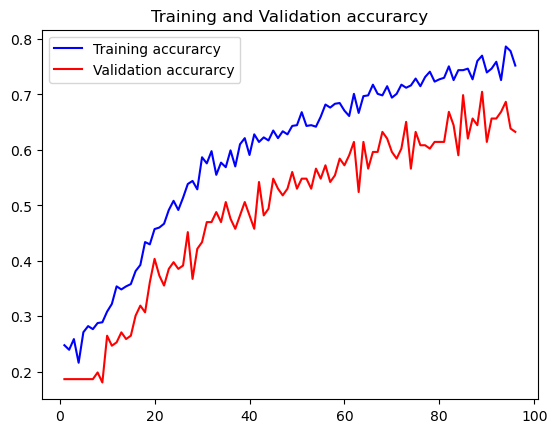

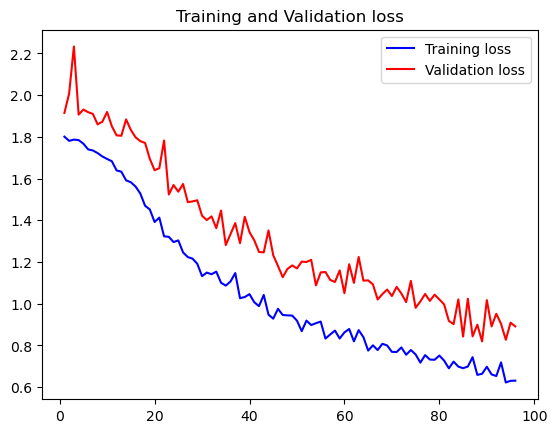

In [98]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 102ms/step


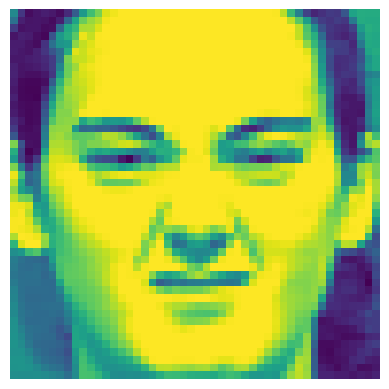

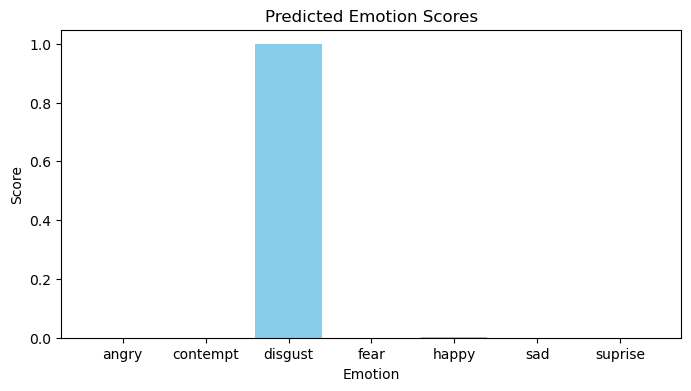

Predicted Emotion: disgust


In [99]:
model = tf.keras.models.load_model('D:/emotionDetection/dataset/train')

img_path = 'D:/emotionDetection/dataset/train/disgust/S035_005_00000019.png'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  

predictions = model.predict(img_array)

emotion_labels = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'sad', 'suprise']

plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(emotion_labels, predictions[0], color='skyblue')
plt.title('Predicted Emotion Scores')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.show()

predicted_class_index = np.argmax(predictions)
predicted_emotion = emotion_labels[predicted_class_index]
print(f"Predicted Emotion: {predicted_emotion}")